<a href="https://colab.research.google.com/github/Trisinus123/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Trisinus Gulo

Kelas : TI-3C

Absen :

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Beberapa Library

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
from matplotlib import pyplot as plt

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

# Konvolusi Tanpa Library

In [3]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1
  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution 2d
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [4]:
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

# Menentukan karnel yang akan digunakan

In [5]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

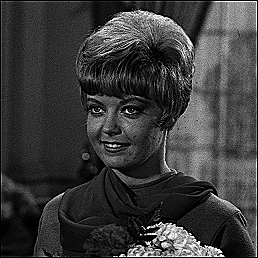

In [6]:
cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

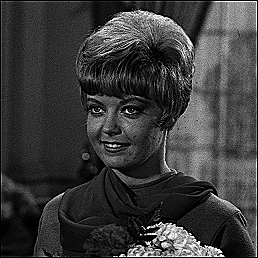

In [7]:
# Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

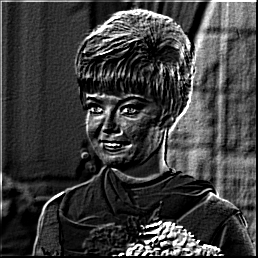

In [8]:
# Emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray,kernel_emboss,1,2))

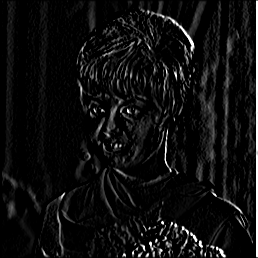

In [9]:
# Left Sobel Edge Detection
kernel_leftsobel = np.array([[1,0,-1],
                             [2,0,-2],
                             [1,0,-1]])

cv2_imshow(convolution2d(img_gray,kernel_leftsobel,1,2))

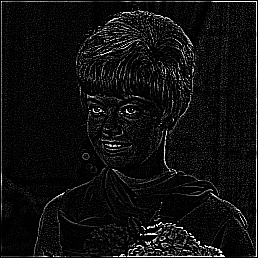

In [10]:
# Canny Edge Detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray,kernel_canny,1,2))

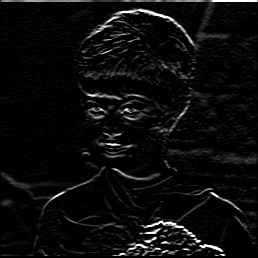

In [11]:
# Prewitt Edge Detection
kernel_prewitt= np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

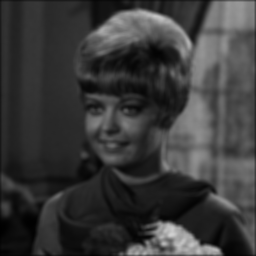

In [12]:
# 5x5 Gaussian Blur
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss= gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, kernel_gauss, 1, 2))


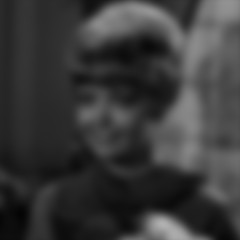

In [13]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))


# Tugas

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

ValueError: ignored

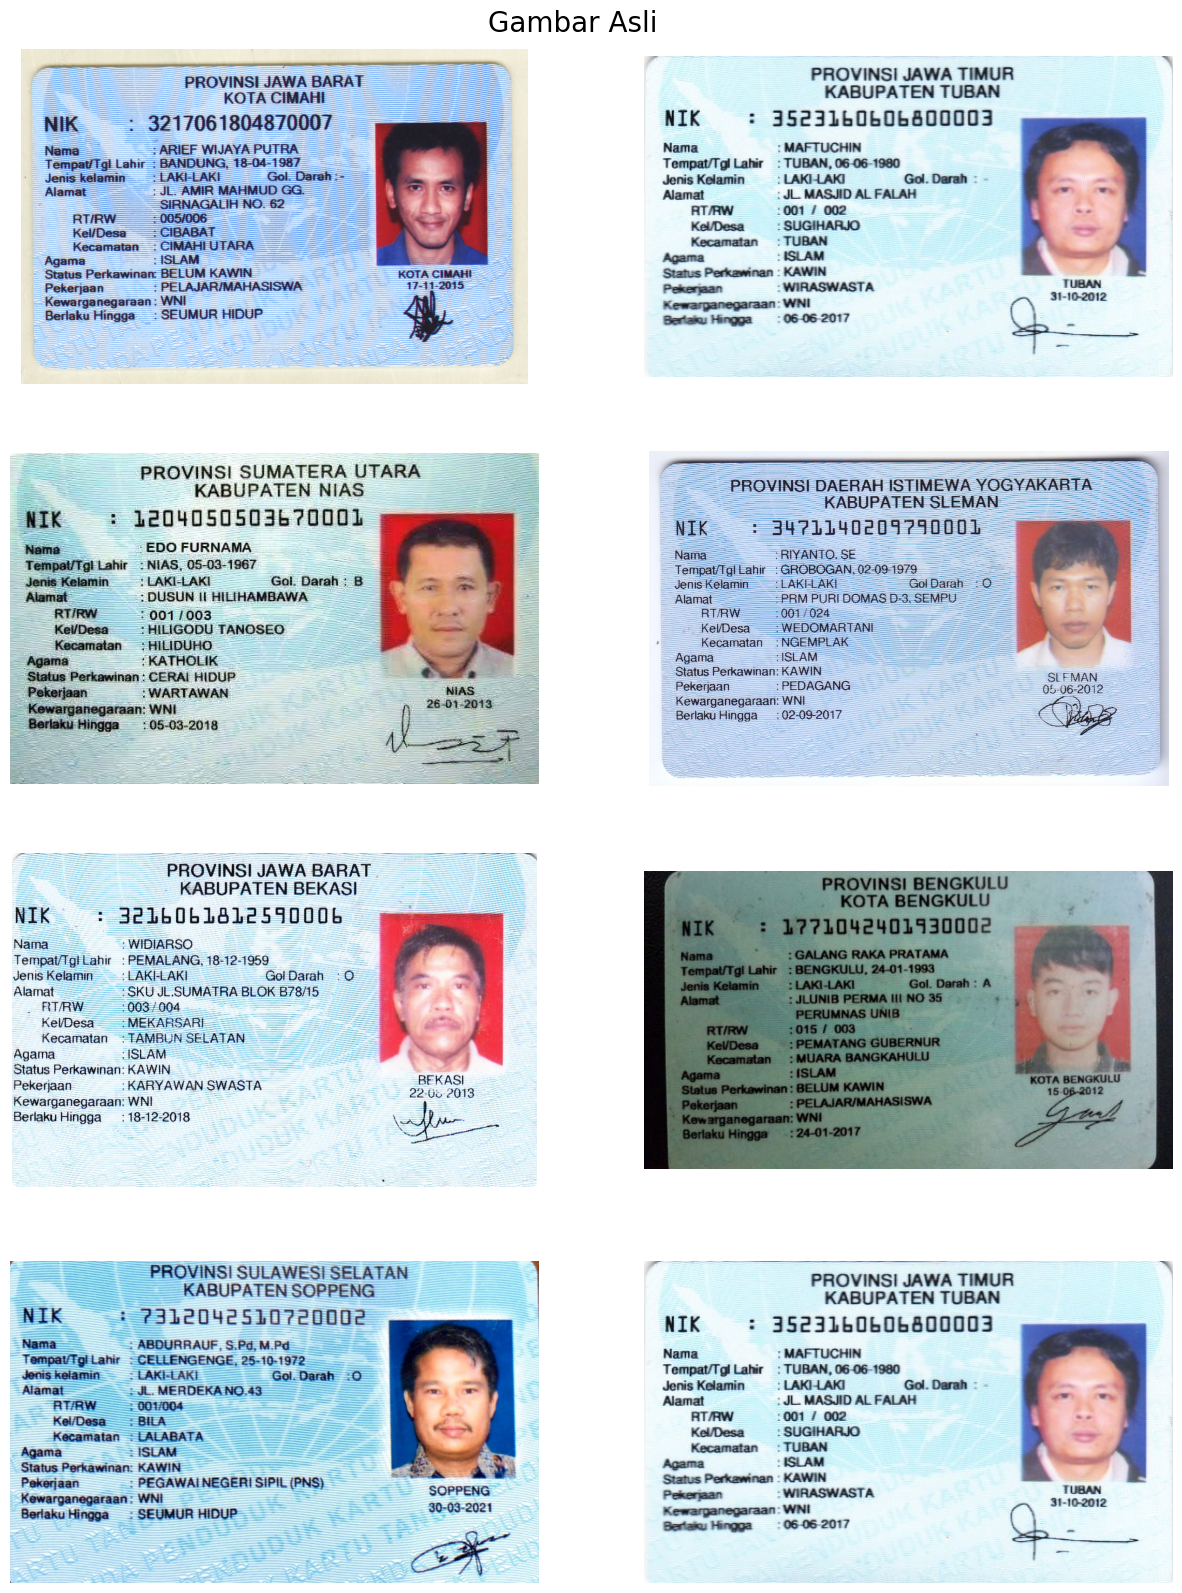

In [202]:
import cv2
import glob
from matplotlib import pyplot as plt
import numpy as np

# Membaca gambar KTP
cv_img = []
for img in glob.glob('/content/drive/MyDrive/dataset KTP/KTP_More/*'):
    n = cv2.imread(img)
    cv_img.append(n)

# Menghitung jumlah total gambar
total_images = len(cv_img)

# Mengatur jumlah kolom dalam grid (dalam hal ini, 2 gambar per baris)
columns = 2
# Menghitung jumlah baris yang diperlukan
rows = (total_images + columns - 1) // columns

# Membuat tampilan dengan ukuran yang sesuai
plt.figure(figsize=(15, 5 * rows))

# 1. Histogram Equalization
gambar_equalized = []

for gambar in cv_img:
    gambar_abu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    gambar_equalized_temp = cv2.equalizeHist(gambar_abu)
    gambar_equalized_temp = cv2.cvtColor(gambar_equalized_temp, cv2.COLOR_GRAY2BGR)
    gambar_equalized.append(gambar_equalized_temp)

# 2. Operasi Aritmatika (Peningkatan Kecerahan)
faktor_kecerahan = 50
gambar_terang = []

for gambar in cv_img:
    # Menambahkan faktor kecerahan ke setiap saluran warna (BGR)
    gambar_terang_temp = cv2.convertScaleAbs(gambar, alpha=1, beta=faktor_kecerahan)
    gambar_terang.append(gambar_terang_temp)

# 3. Filterisasi dan Deteksi (Contoh: Deteksi Tepi)
gambar_dideteksi = []

for gambar in cv_img:
    gambar_abu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    gambar_tepi = cv2.Canny(gambar_abu, 100, 200)  # Menggunakan metode Canny untuk deteksi tepi
    gambar_dideteksi.append(cv2.cvtColor(gambar_tepi, cv2.COLOR_GRAY2BGR))

# Menampilkan gambar asli
for i, image in enumerate(cv_img):
    plt.subplot(rows, columns, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.suptitle('Gambar Asli', fontsize=20, y=0.9)

# Menampilkan gambar yang sudah diequalisasi histogram
for i, gambar_equalized in enumerate(gambar_equalized):
    plt.subplot(rows, columns, 2 * total_images + i + 1)
    plt.imshow(cv2.cvtColor(gambar_equalized[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.suptitle('Gambar yang Sudah Di-Equalisasi Histogram', fontsize=20, y=0.9)

# Menampilkan gambar yang sudah diterangi
for i, gambar_terang in enumerate(gambar_terang):
    plt.subplot(rows, columns, 2 * total_images + i + 1)
    plt.imshow(cv2.cvtColor(gambar_terang[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.suptitle('Gambar yang Sudah Diterangi', fontsize=20, y=0.9)

# Menampilkan gambar yang sudah dideteksi tepi
for i, gambar_tepi in enumerate(gambar_dideteksi):
    plt.subplot(rows, columns, 3 * total_images + i + 1)
    plt.imshow(cv2.cvtColor(gambar_tepi, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.suptitle('Gambar yang Sudah Dideteksi Tepi', fontsize=20, y=0.9)

plt.show()
